## CREDIT CARD FRAUD DETECTION SYSTEM

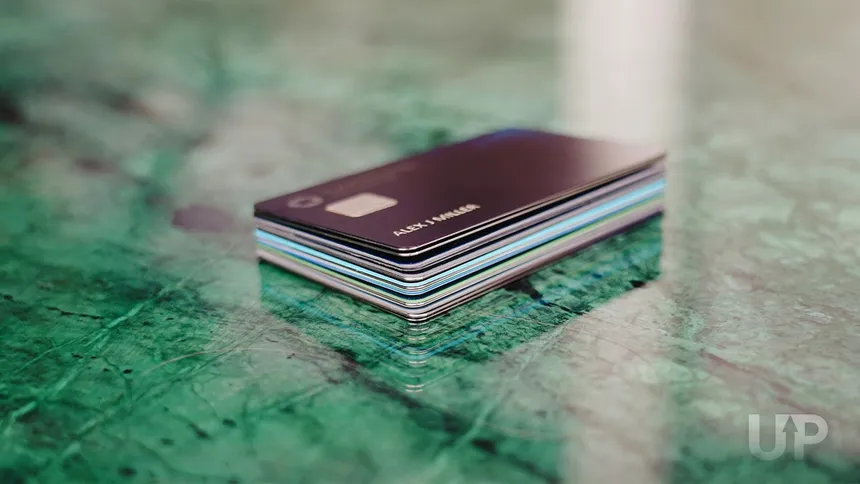

**PROJECT OVERVIEW**
* This project deals with the creation of a machine learning model to classify fraudalent transactions for financial
institutions

**BACKGROUND INFORMATION**
* The global financial landscape has witnessed a significant surge in electronic transactions, especially through credit cards, owing to the convenience they offer. However, this widespread usage has also led to an increase in credit card fraud incidents. Fraudsters employ sophisticated techniques to compromise the security of credit card transactions, posing a serious threat to financial institutions and cardholders alike.In response to this, the need for advanced fraud detection and prevention systems has become paramount. Traditional methods are often inadequate in identifying subtle patterns indicative of fraudulent activities. As a result, there is a critical requirement for a robust Credit Card Fraud Prediction System that leverages advanced machine learning algorithms to enhance the security of electronic transactions and protect the interests of both financial institutions and consumers. 

**CHALLANGES**
* Data privacy and regulations
* Emerging fraud tactics 
* Imbalanced datasets

**SOLUTIONS**
* Sampling Techniques: Employ oversampling (SMOTE, ADASYN) or
    undersampling techniques to balance the classes in the dataset, 
    ensuring equal representation of both fraudulent and non-fraudulent transactions.
    
* Continuous Learning: Implement mechanisms like online learning or
    incremental training to allow models to adapt continuously to new fraud patterns as they emerge.
    
* Anonymization and Encryption: Apply data anonymization and encryption techniques to protect sensitive information 
    while ensuring compliance with regulations

**PROBLEM STATEMENT**

Credit card fraud poses a severe risk to the financial industry, leading to financial losses, compromised customer trust, and increased operational challenges. Traditional rule-based systems for fraud detection often fall short in recognizing evolving fraud patterns. Therefore, there is a pressing need for an intelligent system that can analyze vast amounts of transaction data in real-time, identify anomalous patterns, and accurately predict instances of credit card fraud.

**OBJECTIVES**
- To find out which time of the year where the fraudalent transactions take time more
- To build a predictive model than can accurately distinguish between legitimate and fraudalent transactions 

DATA UNDERSTANDING
* Data source - https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")



In [2]:
#load the dataset
df = pd.read_csv(r"C:\Users\nimu\Downloads\archive (16)\creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
def read_csv_file(file_path):
    try:
        # Read CSV file
        data = pd.read_csv(file_path)

        # Display data types
        print("Data Types:")
        print(data.dtypes)

        # Display shape
        print("\nShape:")
        print(data.shape)

        # Display info
        print("\nInfo:")
        print(data.info())

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")

file_path = (r"C:\Users\nimu\Downloads\archive (16)\creditcard_2023.csv")  
read_csv_file(file_path)


Data Types:
id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Shape:
(568630, 31)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5    

In [4]:
#check for missing values
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#check for duplicated values
df.duplicated().any().sum()

0

In [6]:
# statistical summary of selected columns
cols =df[["Amount","Class"]]
cols.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,568630.0,12041.957635,6919.644449,50.01,6054.8925,12030.15,18036.33,24039.93
Class,568630.0,0.500000,0.500000,0.00,0.0000,0.50,1.00,1.00


In [7]:
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

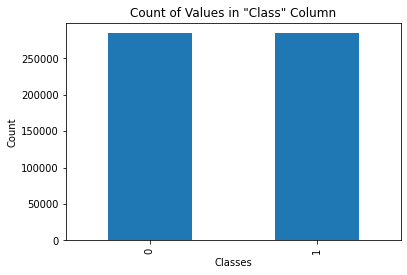

In [8]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Count of Values in "Class" Column')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

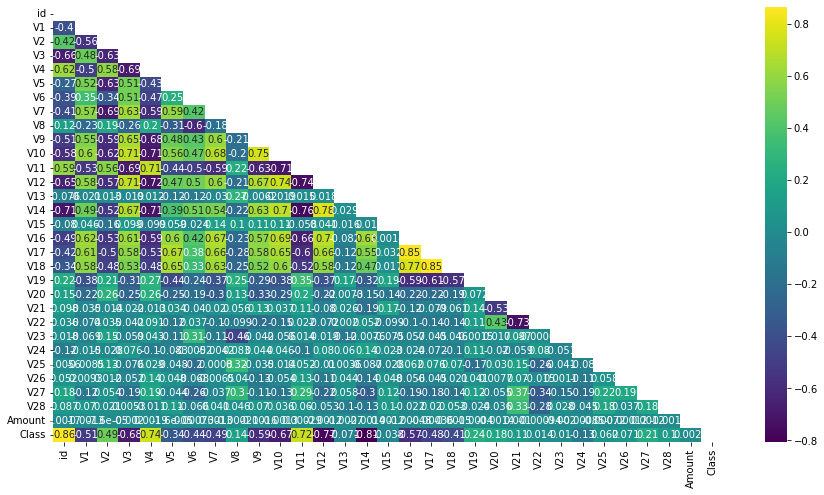

In [9]:
plt.figure(figsize=(15, 8))
mask = np.triu(df.corr())  # Create a mask to display only the upper half of the matrix
sns.heatmap(df.corr(), annot=True, cmap='viridis', mask=mask)
plt.show()

MODEL TRAINING AND TESTING

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of test and training samples
print("Number of test samples:", X_test.shape[0])
print("Number of training samples:", X_train.shape[0])

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train) 

lr=LogisticRegression()

lr.fit(x_train_scaled,y_train)

Number of test samples: 113726
Number of training samples: 454904


LogisticRegression()

In [14]:
 predictions = lr.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
score = accuracy_score(y_test, predictions) 
score

0.5010991330038865